In [247]:
#importing necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle

In [250]:
#getting the dateset
!pip install ucimlrepo

In [322]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer = fetch_ucirepo(id=14) 
  
# data (as pandas dataframes) 
X = breast_cancer.data.features 
y = breast_cancer.data.targets 
  
# metadata 
print(breast_cancer.metadata) 
  
# variable information 
print(breast_cancer.variables) 


{'uci_id': 14, 'name': 'Breast Cancer', 'repository_url': 'https://archive.ics.uci.edu/dataset/14/breast+cancer', 'data_url': 'https://archive.ics.uci.edu/static/public/14/data.csv', 'abstract': 'This breast cancer domain was obtained from the University Medical Centre, Institute of Oncology, Ljubljana, Yugoslavia. This is one of three domains provided by the Oncology Institute that has repeatedly appeared in the machine learning literature. (See also lymphography and primary-tumor.)', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 286, 'num_features': 9, 'feature_types': ['Categorical'], 'demographics': ['Age'], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1988, 'last_updated': 'Thu Mar 07 2024', 'dataset_doi': '10.24432/C51P4M', 'creators': ['Matjaz Zwitter', 'Milan Soklic'], 'intro_paper': None, 'additional_info': {'summary': 'Thi

### Data Preprocessing

In [323]:
X['Class'] = y
data = X

In [324]:
#checking any null value in the data
data.isnull().sum()

age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      8
deg-malig      0
breast         0
breast-quad    1
irradiat       0
Class          0
dtype: int64

In [325]:
data[data['breast-quad'].isnull()]

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
206,50-59,ge40,30-34,0-2,no,3,left,NaN,no,recurrence-events


In [326]:
#droping that particular row where breat_quad is NaN
data.drop(index=[206],inplace=True)

In [327]:
data.isnull().sum()

age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      8
deg-malig      0
breast         0
breast-quad    0
irradiat       0
Class          0
dtype: int64

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 285 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          285 non-null    object
 1   menopause    285 non-null    object
 2   tumor-size   285 non-null    object
 3   inv-nodes    285 non-null    object
 4   node-caps    277 non-null    object
 5   deg-malig    285 non-null    int64 
 6   breast       285 non-null    object
 7   breast-quad  285 non-null    object
 8   irradiat     285 non-null    object
 9   Class        285 non-null    object
dtypes: int64(1), object(9)
memory usage: 24.5+ KB


In [338]:
data.shape

(285, 10)

In [339]:
print('Age Unique Values:' ,data['age'].unique())
print('menopause Unique Values:' ,data['menopause'].unique())
print('tumor-size Unique Values:' ,data['tumor-size'].unique())
print('inv-nodes Values:' ,data['inv-nodes'].unique())
print('node-caps Values:' ,data['node-caps'].unique())
print('deg-malig Unique Values:' ,data['deg-malig'].unique())
print('breast Values:' ,data['breast'].unique())
print('breast_quad Unique Values:' ,data['breast-quad'].unique())
print('irradiat Unique Values:' ,data['irradiat'].unique())
print('class Unique Values:' ,data['Class'].unique())

Age Unique Values: ['30-39' '40-49' '60-69' '50-59' '70-79' '20-29']
menopause Unique Values: ['premeno' 'ge40' 'lt40']
tumor-size Unique Values: ['30-34' '20-24' '15-19' '0-4' '25-29' '50-54' '10-14' '40-44' '35-39'
 '5-9' '45-49']
inv-nodes Values: ['30-34' '20-24' '15-19' '0-4' '25-29' '50-54' '10-14' '40-44' '35-39'
 '5-9' '45-49']
node-caps Values: ['no' 'yes' nan]
deg-malig Unique Values: [3 2 1]
breast Values: ['left' 'right']
breast_quad Unique Values: ['left_low' 'right_up' 'left_up' 'right_low' 'central']
irradiat Unique Values: ['no' 'yes']
class Unique Values: ['no-recurrence-events' 'recurrence-events']


In [340]:
#replacing the wrong values with correct values
data['tumor-size'] = data['tumor-size'].replace('14-Oct','10-14')
data['tumor-size'] = data['tumor-size'].replace('9-May','5-9')

data['inv-nodes'] = data['tumor-size'].replace('8-Jun','6-8')
data['inv-nodes'] = data['tumor-size'].replace('11-Sep','9-11')
data['inv-nodes'] = data['tumor-size'].replace('5-Mar','3-5')
data['inv-nodes'] = data['tumor-size'].replace('14-Dec','12-14')





In [341]:
print('Age Unique Values:' ,data['age'].unique())
print('menopause Unique Values:' ,data['menopause'].unique())
print('tumor-size Unique Values:' ,data['tumor-size'].unique())
print('inv-nodes Values:' ,data['inv-nodes'].unique())
print('node-caps Values:' ,data['node-caps'].unique())
print('deg-malig Unique Values:' ,data['deg-malig'].unique())
print('breast Values:' ,data['breast'].unique())
print('breast_quad Unique Values:' ,data['breast-quad'].unique())
print('irradiat Unique Values:' ,data['irradiat'].unique())
print('class Unique Values:' ,data['Class'].unique())

Age Unique Values: ['30-39' '40-49' '60-69' '50-59' '70-79' '20-29']
menopause Unique Values: ['premeno' 'ge40' 'lt40']
tumor-size Unique Values: ['30-34' '20-24' '15-19' '0-4' '25-29' '50-54' '10-14' '40-44' '35-39'
 '5-9' '45-49']
inv-nodes Values: ['30-34' '20-24' '15-19' '0-4' '25-29' '50-54' '10-14' '40-44' '35-39'
 '5-9' '45-49']
node-caps Values: ['no' 'yes' nan]
deg-malig Unique Values: [3 2 1]
breast Values: ['left' 'right']
breast_quad Unique Values: ['left_low' 'right_up' 'left_up' 'right_low' 'central']
irradiat Unique Values: ['no' 'yes']
class Unique Values: ['no-recurrence-events' 'recurrence-events']


In [342]:
data[(data['node-caps']!='no') & (data['node-caps']!='yes')]

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
145,40-49,premeno,25-29,25-29,NaN,2,left,right_low,yes,no-recurrence-events
163,60-69,ge40,25-29,25-29,NaN,1,right,left_up,yes,no-recurrence-events
164,60-69,ge40,25-29,25-29,NaN,1,right,left_low,yes,no-recurrence-events
183,50-59,ge40,30-34,30-34,NaN,3,left,left_up,yes,no-recurrence-events
184,50-59,ge40,30-34,30-34,NaN,3,left,left_low,yes,no-recurrence-events
233,70-79,ge40,15-19,15-19,NaN,1,left,left_low,yes,recurrence-events
263,50-59,lt40,20-24,20-24,NaN,1,left,left_up,no,recurrence-events
264,50-59,lt40,20-24,20-24,NaN,1,left,left_low,no,recurrence-events


In [343]:
data[(data['node-caps'].isnull())]

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
145,40-49,premeno,25-29,25-29,NaN,2,left,right_low,yes,no-recurrence-events
163,60-69,ge40,25-29,25-29,NaN,1,right,left_up,yes,no-recurrence-events
164,60-69,ge40,25-29,25-29,NaN,1,right,left_low,yes,no-recurrence-events
183,50-59,ge40,30-34,30-34,NaN,3,left,left_up,yes,no-recurrence-events
184,50-59,ge40,30-34,30-34,NaN,3,left,left_low,yes,no-recurrence-events
233,70-79,ge40,15-19,15-19,NaN,1,left,left_low,yes,recurrence-events
263,50-59,lt40,20-24,20-24,NaN,1,left,left_up,no,recurrence-events
264,50-59,lt40,20-24,20-24,NaN,1,left,left_low,no,recurrence-events


In [344]:
data['node-caps'].unique()

array(['no', 'yes', nan], dtype=object)

In [345]:
data.dropna()
data.shape

(285, 10)

In [346]:
data['node-caps'].isnull().sum()

np.int64(8)

In [347]:
data[data['Class'].isnull()]

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class


In [351]:
data.isna().sum()

age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      8
deg-malig      0
breast         0
breast-quad    0
irradiat       0
Class          0
dtype: int64

In [352]:
#converting categorical columns into numerical
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
label_encoder_age = LabelEncoder()
label_encoder_tumor_size = LabelEncoder()
label_encoder_inv_nodes = LabelEncoder()
label_encoder_node_caps = LabelEncoder()
label_encoder_breast_pos = LabelEncoder()
label_encoder_irradiat = LabelEncoder()
label_encoder_class = LabelEncoder()


data['age'] = label_encoder_age.fit_transform(data['age'])
data['tumor-size'] = label_encoder_tumor_size.fit_transform(data['tumor-size'])
data['inv-nodes'] = label_encoder_inv_nodes.fit_transform(data['inv-nodes'])
data['node-caps'] = label_encoder_node_caps.fit_transform(data['node-caps'])
data['breast'] = label_encoder_breast_pos.fit_transform(data['breast'])
data['irradiat'] = label_encoder_irradiat.fit_transform(data['irradiat'])
data['Class'] = label_encoder_class.fit_transform(data['Class'])

data.tail()



,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
281,1,premeno,5,5,0,2,0,left_up,0,1
282,1,premeno,3,3,0,3,0,left_up,1,1
283,4,ge40,3,3,0,1,1,left_up,0,1
284,2,ge40,5,5,0,3,0,left_low,0,1
285,3,ge40,5,5,0,3,0,left_low,0,1


In [353]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder_menopause = OneHotEncoder()
onehotencoder_breast_quad = OneHotEncoder()
menupause_encoder = onehotencoder_menopause.fit_transform(data[['menopause']])
breast_quad_encoder = onehotencoder_breast_quad.fit_transform(data[['breast-quad']])


In [354]:
menupause_encoder_df = pd.DataFrame(menupause_encoder.toarray(),columns=onehotencoder_menopause.get_feature_names_out(['menopause']))
breast_quad_encoder_df = pd.DataFrame(breast_quad_encoder.toarray(),columns=onehotencoder_breast_quad.get_feature_names_out(['breast-quad']))

In [355]:
data=pd.concat([data.drop('menopause',axis=1),menupause_encoder_df],axis=1)
data.head()

,age,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class,menopause_ge40,menopause_lt40,menopause_premeno
0,1.0,5.0,5.0,0.0,3.0,0.0,left_low,0.0,0.0,0.0,0.0,1.0
1,2.0,3.0,3.0,0.0,2.0,1.0,right_up,0.0,0.0,0.0,0.0,1.0
2,2.0,3.0,3.0,0.0,2.0,0.0,left_low,0.0,0.0,0.0,0.0,1.0
3,4.0,2.0,2.0,0.0,2.0,1.0,left_up,0.0,0.0,1.0,0.0,0.0
4,2.0,0.0,0.0,0.0,2.0,1.0,right_low,0.0,0.0,0.0,0.0,1.0


In [356]:
data=pd.concat([data.drop('breast-quad',axis=1),breast_quad_encoder_df],axis=1)


In [357]:
data

,age,tumor-size,inv-nodes,node-caps,deg-malig,breast,irradiat,Class,menopause_ge40,menopause_lt40,menopause_premeno,breast-quad_central,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up
0,1.0,5.0,5.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,2.0,3.0,3.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,2.0,3.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,4.0,2.0,2.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,1.0,3.0,3.0,0.0,3.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
283,4.0,3.0,3.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
284,2.0,5.0,5.0,0.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
285,3.0,5.0,5.0,0.0,3.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [301]:
data.drop(index=[281,282,283,284,285],inplace=True)

In [360]:
data.dropna()

,age,tumor-size,inv-nodes,node-caps,deg-malig,breast,irradiat,Class,menopause_ge40,menopause_lt40,menopause_premeno,breast-quad_central,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up
0,1.0,5.0,5.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,2.0,3.0,3.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,2.0,3.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,4.0,2.0,2.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,3.0,7.0,7.0,1.0,3.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
281,1.0,5.0,5.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
282,1.0,3.0,3.0,0.0,3.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
283,4.0,3.0,3.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [364]:
data[data['Class'].isnull()]


,age,tumor-size,inv-nodes,node-caps,deg-malig,breast,irradiat,Class,menopause_ge40,menopause_lt40,menopause_premeno,breast-quad_central,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up
206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [369]:
data.drop(index=[206],inplace=True)

In [399]:
data

,age,tumor-size,inv-nodes,node-caps,deg-malig,breast,irradiat,Class,menopause_ge40,menopause_lt40,menopause_premeno,breast-quad_central,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up
0,1.0,5.0,5.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,2.0,3.0,3.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,2.0,3.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,4.0,2.0,2.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,3.0,7.0,7.0,1.0,3.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
281,1.0,5.0,5.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
282,1.0,3.0,3.0,0.0,3.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
283,4.0,3.0,3.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [400]:
data[data['Class'].isnull()]


,age,tumor-size,inv-nodes,node-caps,deg-malig,breast,irradiat,Class,menopause_ge40,menopause_lt40,menopause_premeno,breast-quad_central,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up


In [401]:
data.drop(index=[285],inplace=True)

KeyError: '[285] not found in axis'

In [402]:
data.to_csv('preprocessed_data.csv',index=False)

In [403]:
#save encoder 
with open('label_encoder_age.pkl','wb') as file:
    pickle.dump(label_encoder_age,file)
with open('label_encoder_breast_pos.pkl','wb') as file:
    pickle.dump(label_encoder_breast_pos,file)
with open('label_encoder_inv_nodes.pkl','wb') as file:
    pickle.dump(label_encoder_inv_nodes,file)
with open('label_encoder_class.pkl','wb') as file:
    pickle.dump(label_encoder_class,file)
with open('label_encoder_node_caps.pkl','wb') as file:
    pickle.dump(label_encoder_node_caps,file)
with open('label_encoder_irradiat.pkl','wb') as file:
    pickle.dump(label_encoder_irradiat,file)
with open('label_encoder_tumorsize.pkl','wb') as file:
    pickle.dump(label_encoder_tumor_size,file)
with open('onehot_encoder_breast_quad.pkl','wb') as file:
    pickle.dump(onehotencoder_breast_quad,file)
with open('onehot_encoder_menopause.pkl','wb') as file:
    pickle.dump(onehotencoder_menopause,file)


### Data Visualization

In [404]:
!pip install seaborn

In [405]:
import seaborn as sns


<Axes: xlabel='inv-nodes', ylabel='tumor-size'>

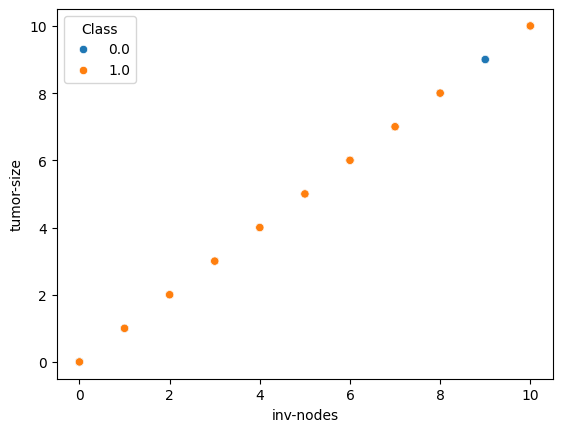

In [406]:
sns.scatterplot(x=data['inv-nodes'],y=data['tumor-size'],hue=data['Class'])

<Axes: >

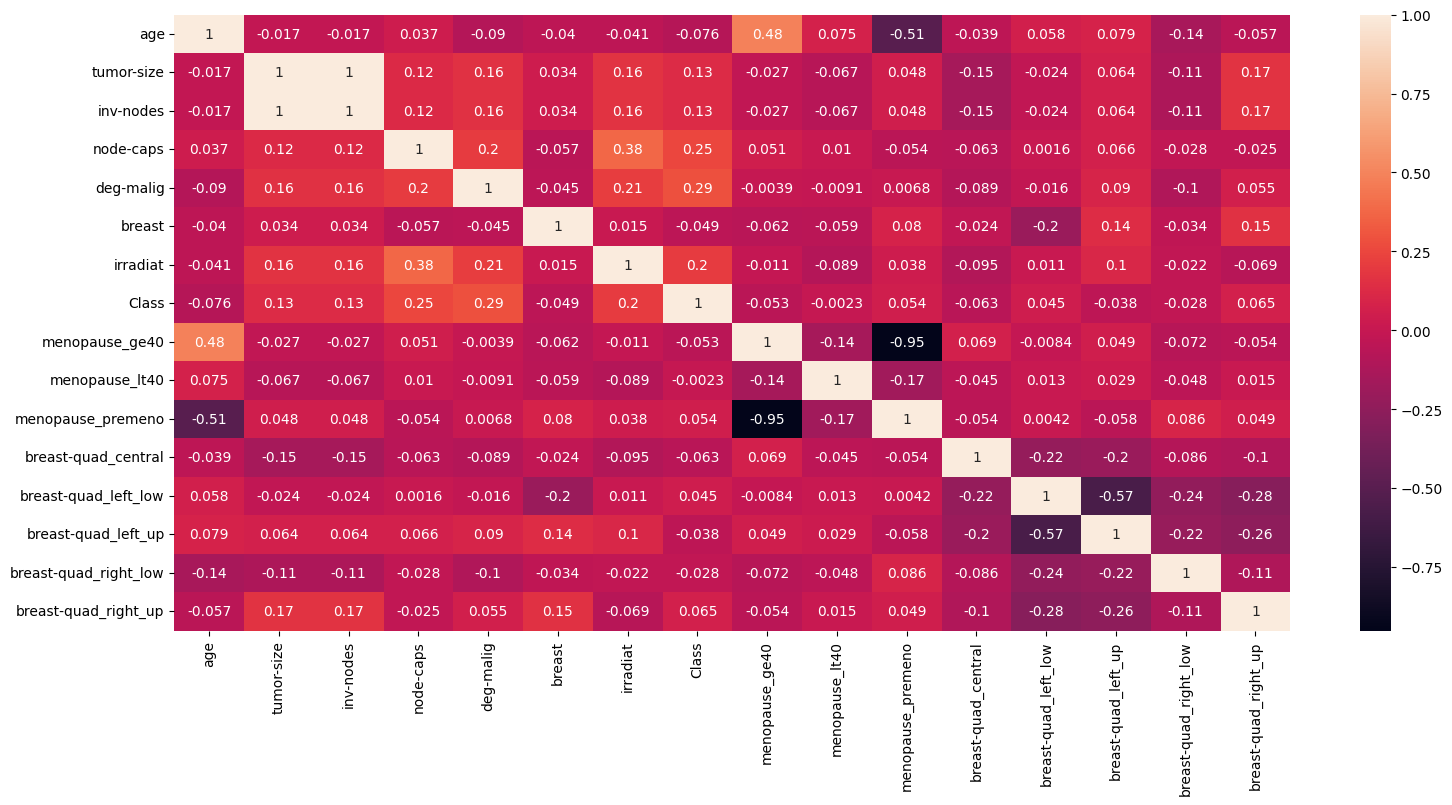

In [407]:
#correlation
plt.figure(figsize=(18,8))
sns.heatmap(data.corr(),annot=True)

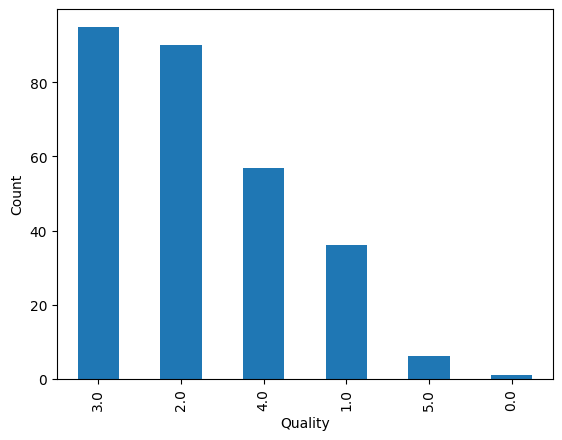

In [408]:
X['age'].value_counts().plot(kind='bar')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='inv-nodes', ylabel='Count'>

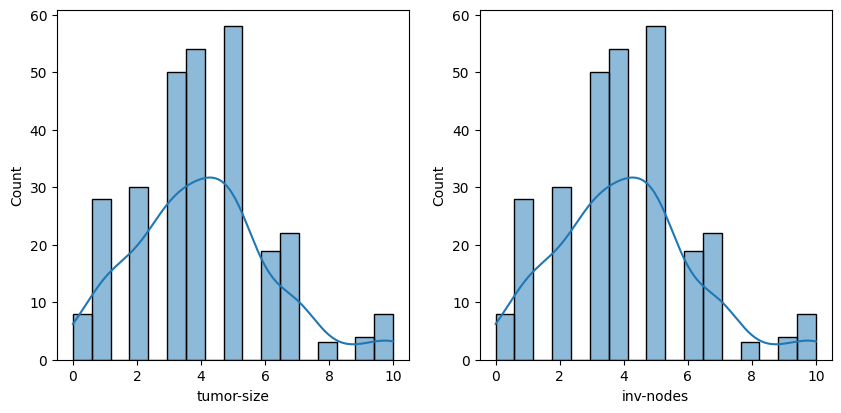

In [409]:
#distributions 
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.histplot(data['tumor-size'], kde=True)
plt.subplot(2,2,2)
sns.histplot(data['inv-nodes'], kde=True)


### Splitting Data

In [410]:
#dividing data into dependent and independent featurs
X = data.drop('Class', axis=1)
y = data['Class']


#spliting the data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=42)

#scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [411]:
#saving scaler model
with open('scaler.pkl','wb') as file:
    pickle.dump(scaler,file)

### Modeling

In [412]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 

In [413]:
models = {
        "Random Forest":RandomForestClassifier(),   
        "GradientBoostingClassifier":GradientBoostingClassifier(),
        "DecisionTreeClassifier":DecisionTreeClassifier(),
        "LogisticRegression": LogisticRegression(),
        "AdaBoostClassifier": AdaBoostClassifier(),
        "DecisionTreeClassifier":DecisionTreeClassifier(),
        "BernoulliNB":BernoulliNB(),
        "KNeighborsClassifier": KNeighborsClassifier(n_neighbors=5,algorithm='auto')
}

for i in range(len(models)):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    y_pred_train = model.predict(X_train) #traning prediction
    y_pred_test = model.predict(X_test) #test data prediction

    #traning performance metrics
    acc_score_train = accuracy_score(y_pred_train,y_train)
    prec_score_train = precision_score(y_pred_train,y_train)
    f_score_train = f1_score(y_pred_train,y_train)
    recl_score_train = recall_score(y_pred_train,y_train)
    roc_score_train = roc_auc_score(y_pred_train,y_train)

    #test performance metrics
    acc_score_test = accuracy_score(y_pred_test,y_test)
    prec_score_test = precision_score(y_pred_test,y_test)
    f_score_test = f1_score(y_pred_test,y_test)
    recl_score_test = recall_score(y_pred_test,y_test)
    roc_score_test = roc_auc_score(y_pred_test,y_test)

   
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(acc_score_train))
    print('- F1 score: {:.4f}'.format(f_score_train))
    
    print('- Precision: {:.4f}'.format(prec_score_train))
    print('- Recall: {:.4f}'.format(recl_score_train))
    print('- Roc Auc Score: {:.4f}'.format(roc_score_train))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(acc_score_test))
    print('- F1 score: {:.4f}'.format(f_score_test))
    print('- Precision: {:.4f}'.format(prec_score_test))
    print('- Recall: {:.4f}'.format(recl_score_test))
    print('- Roc Auc Score: {:.4f}'.format(roc_score_test))

    print('='*35)
    print('\n')

Random Forest
Model performance for Training set
- Accuracy: 0.9956
- F1 score: 0.9921
- Precision: 1.0000
- Recall: 0.9844
- Roc Auc Score: 0.9922
----------------------------------
Model performance for Test set
- Accuracy: 0.7368
- F1 score: 0.5455
- Precision: 0.4500
- Recall: 0.6923
- Roc Auc Score: 0.7212


GradientBoostingClassifier
Model performance for Training set
- Accuracy: 0.9075
- F1 score: 0.8142
- Precision: 0.7302
- Recall: 0.9200
- Roc Auc Score: 0.9120
----------------------------------
Model performance for Test set
- Accuracy: 0.7544
- F1 score: 0.5333
- Precision: 0.4000
- Recall: 0.8000
- Roc Auc Score: 0.7723


DecisionTreeClassifier
Model performance for Training set
- Accuracy: 0.9956
- F1 score: 0.9920
- Precision: 0.9841
- Recall: 1.0000
- Roc Auc Score: 0.9970
----------------------------------
Model performance for Test set
- Accuracy: 0.6667
- F1 score: 0.4571
- Precision: 0.4000
- Recall: 0.5333
- Roc Auc Score: 0.6238


LogisticRegression
Model performa

In [414]:
## Hyperparameter Training
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

In [415]:
random_cv_models = [
             ('RF',RandomForestClassifier() , rf_params)           
]

In [418]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name,model,param in random_cv_models:
    rand_cv = RandomizedSearchCV(estimator=model,param_distributions=param,n_iter=100,cv=3,verbose=0,n_jobs=-1)
    rand_cv.fit(X_train,y_train)
    model_param[name] = rand_cv.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

---------------- Best Params for RF -------------------
{'n_estimators': 100, 'min_samples_split': 20, 'max_features': 8, 'max_depth': 10}


d:\ML\DL Projects\Breast Cancer Detection\venv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
63 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
46 fits failed with the following error:
Traceback (most recent call last):
  File "d:\ML\DL Projects\Breast Cancer Detection\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\ML\DL Projects\Breast Cancer Detection\venv\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
  File "d:\ML\DL Projects\Breast Cancer Detection\venv\Lib\site-packages\sklearn\base.py", line 471, in _validate_param

In [419]:
models = {
        "Random Forest":RandomForestClassifier(n_estimators=100, min_samples_split=20, max_features=8, max_depth=10),   
}

for i in range(len(models)):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    y_pred_train = model.predict(X_train) #traning prediction
    y_pred_test = model.predict(X_test) #test data prediction

    #traning performance metrics
    acc_score_train = accuracy_score(y_pred_train,y_train)
    prec_score_train = precision_score(y_pred_train,y_train)
    f_score_train = f1_score(y_pred_train,y_train)
    recl_score_train = recall_score(y_pred_train,y_train)
    roc_score_train = roc_auc_score(y_pred_train,y_train)

    #test performance metrics
    acc_score_test = accuracy_score(y_pred_test,y_test)
    prec_score_test = precision_score(y_pred_test,y_test)
    f_score_test = f1_score(y_pred_test,y_test)
    recl_score_test = recall_score(y_pred_test,y_test)
    roc_score_test = roc_auc_score(y_pred_test,y_test)

   
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(acc_score_train))
    print('- F1 score: {:.4f}'.format(f_score_train))
    
    print('- Precision: {:.4f}'.format(prec_score_train))
    print('- Recall: {:.4f}'.format(recl_score_train))
    print('- Roc Auc Score: {:.4f}'.format(roc_score_train))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(acc_score_test))
    print('- F1 score: {:.4f}'.format(f_score_test))
    print('- Precision: {:.4f}'.format(prec_score_test))
    print('- Recall: {:.4f}'.format(recl_score_test))
    print('- Roc Auc Score: {:.4f}'.format(roc_score_test))

    print('='*35)
    print('\n')

Random Forest
Model performance for Training set
- Accuracy: 0.8194
- F1 score: 0.5684
- Precision: 0.4286
- Recall: 0.8438
- Roc Auc Score: 0.8296
----------------------------------
Model performance for Test set
- Accuracy: 0.7719
- F1 score: 0.5806
- Precision: 0.4500
- Recall: 0.8182
- Roc Auc Score: 0.7895




In [420]:
#saving the model
with open('model.pkl','wb') as file:
    pickle.dump(model,file)